In [1]:
from tensorflow.keras.utils import image_dataset_from_directory
import tensorflow as tf
import numpy as np

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
data = image_dataset_from_directory("gdrive/MyDrive/waiste data", 
                             labels='inferred', label_mode='categorical', class_names=None, color_mode='rgb',
                             batch_size=32, image_size=(150, 150), shuffle=True, seed=None,
                             validation_split=None, subset=None, interpolation='bilinear', follow_links=False,
                             crop_to_aspect_ratio=False)

Found 22610 files belonging to 10 classes.


In [5]:
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

data_norm = data.map(process)

In [6]:
data_sample = data.take(100)

data_im = []
data_lb = []

for im, lb in data_sample:
  data_im.append(im)
  data_lb.append(lb)

In [33]:
def norma_2(image):
  image = tf.cast(image/255, tf.float32)
  return image

In [34]:
data_im_2 = [norma_2(image) for image in data_im]

In [35]:
data_im_2 = np.array(data_im_2)
data_lb = np.array(data_lb)

In [36]:
data_im_2 = data_im_2.reshape(-1, 150, 150, 3)
data_lb = data_lb.reshape(-1, 10)

In [42]:
from tensorflow.keras.applications import inception_resnet_v2
import matplotlib.pyplot as plt
from tensorflow.keras import Input
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D, GlobalAveragePooling2D, MaxPool2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
 

In [23]:
inception_resnet_v2 = inception_resnet_v2.InceptionResNetV2(
    include_top=False, weights="imagenet", input_tensor=None,
    input_shape=(150, 150, 3), pooling=None, classifier_activation='softmax')

In [24]:
inception_resnet_v2.trainable = False

In [27]:
def init_model():
  model = Sequential()
  model.add(Input(shape=(150, 150, 3)))
  model.add(inception_resnet_v2)
  model.add(Conv2D(32, (3,3), padding='same', activation="relu"))
  model.add(MaxPool2D(pool_size=(2,2)))
  model.add(Conv2D(32, (2,2), padding='same', activation="relu"))
  model.add(Flatten())
  model.add(Dense(50, activation='relu'))
  model.add(Dropout(0.3))
  model.add(Dense(10, activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics='accuracy')
  return model

In [28]:
model = init_model()

In [29]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_resnet_v2 (Functio (None, 3, 3, 1536)        54336736  
_________________________________________________________________
conv2d_612 (Conv2D)          (None, 3, 3, 32)          442400    
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 1, 1, 32)          0         
_________________________________________________________________
conv2d_613 (Conv2D)          (None, 1, 1, 32)          4128      
_________________________________________________________________
flatten (Flatten)            (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 50)                1650      
_________________________________________________________________
dropout (Dropout)            (None, 50)               

In [31]:
es = EarlyStopping(patience = 10, monitor='val_loss' , mode='max', min_delta=0.001, restore_best_weights = True)

In [ ]:
history = model.fit(data_im_2, data_lb, validation_split = 0.2, callbacks = [es], batch_size = 32, epochs = 100, verbose = 1)

Epoch 1/100
80/80 [==============================] - 194s 2s/step - loss: 1.8060 - accuracy: 0.3785 - val_loss: 1.2523 - val_accuracy: 0.6062
Epoch 2/100
80/80 [==============================] - 183s 2s/step - loss: 1.2026 - accuracy: 0.6160 - val_loss: 1.0263 - val_accuracy: 0.6969
Epoch 3/100
80/80 [==============================] - 186s 2s/step - loss: 0.9617 - accuracy: 0.6961 - val_loss: 0.9565 - val_accuracy: 0.6906
Epoch 4/100
80/80 [==============================] - 183s 2s/step - loss: 0.7872 - accuracy: 0.7496 - val_loss: 1.0051 - val_accuracy: 0.7000
Epoch 5/100
80/80 [==============================] - 180s 2s/step - loss: 0.6820 - accuracy: 0.7926 - val_loss: 1.0284 - val_accuracy: 0.7156
Epoch 6/100
80/80 [==============================] - 180s 2s/step - loss: 0.5401 - accuracy: 0.8305 - val_loss: 0.9954 - val_accuracy: 0.7219
Epoch 7/100
80/80 [==============================] - 180s 2s/step - loss: 0.4792 - accuracy: 0.8547 - val_loss: 1.0390 - val_accuracy: 0.7281
Epoch 

In [43]:
def summarize_diagnostics(history):
  # plot loss
  plt.subplot(211)
  plt.title('Cross Entropy Loss')
  plt.plot(history.history['loss'], color='blue', label='train')
  plt.plot(history.history['val_loss'], color='orange', label='test')
  # plot accuracy
  plt.subplot(212)
  plt.title('Classification Accuracy')
  plt.plot(history.history['accuracy'], color='blue', label='train')
  plt.plot(history.history['val_accuracy'], color='orange', label='test')

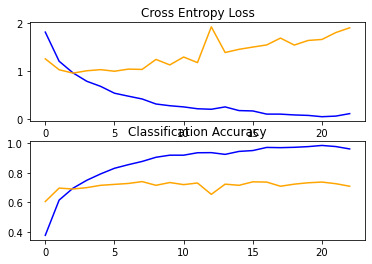

In [44]:
summarize_diagnostics(history)